#Trabalho Computacional - Eletromagnetismo, 2023.2
Alunos: Antônio Apolinário Barbosa (aab2) e Paulo Sérgio Galdino de Souza (psgs)

Prof.: Odilon Maroja


#Problema:



<div style="text-align: justify">
Um anel quadrado de lado L  é mantida a um potencial Vo, como mostrado abaixo. Assuma que o meio
seja espaço livre. Aplique o metodo dos momentos para determinar a distribuição superficial de carga na placa. Para tanto divida cada lado L em N segmentos iguais. Dica: defina N como múltiplo de 4, de forma que L/4 contenha um número inteiro de segmentos.
</div>



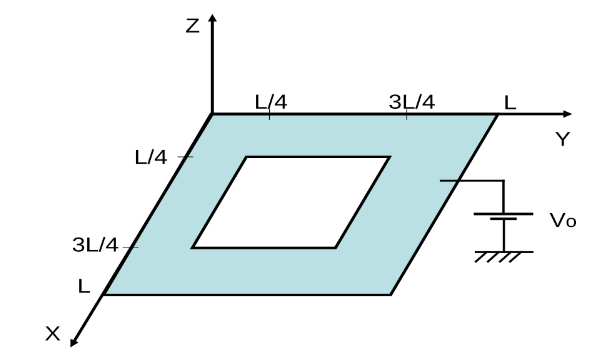

O método dos momentos é uma técnica amplamente utilizada na resolução de problemas eletromagnéticos, especialmente para determinar a distribuição de carga ou corrente em superfícies condutoras. Este método é baseado na expansão de uma distribuição de carga em termos de funções de base conhecidas e é altamente aplicável em uma variedade de problemas práticos. A ideia é que as estruturas sejam discretizadas em pequenas partes chamadas de elementos. No caso do anel quadrado, ele é dividido em N segmentos iguais ao longo de cada lado.

#1. Determine as expressões para os elementos das matrizes de impedância e de tensão do método dos momentos, em função de N.




**- Matriz de impedância:**

A matriz de impedância é uma representação matemática das relações entre as correntes e as tensões em cada segmento do anel quadrado. Quando um anel quadrado é mantido a um potencial Vo, como descrito no problema, as correntes são induzidas nos segmentos do anel devido à diferença de potencial aplicada. A matriz de impedância descreve como essas correntes estão relacionadas às tensões aplicadas. Cada elemento da matriz de impedância $Z_{ij}$ representa a impedância entre o segmento $i$ e o segmento $j$ do anel. No código a seguir, a matriz de impedância está sendo calculada usando o método dos momentos. Os elementos dessa matriz são determinados pelos cálculos das distâncias entre os segmentos do anel e são influenciados pelas características geométricas do anel e pelas propriedades do meio  com permitividade epsilon_0.

Para análise do problema é necessário considerar que os elementos da matriz de impedância são dados por: $1\leq i  \leq  N^{2}$ e $1\leq j  \leq  N^{2}$, levando em consideração três condições:

- Se i != j: $Zij \simeq \frac{ 1}{4\pi \varepsilon_0 }\frac{\triangle ^{2} }{ \sqrt{(x_i-x_j)^2+(y_i-y_j)^2} }$
- Se i = j: $\frac{ 1}{4\pi \varepsilon_0 }ln(1+ \sqrt{2}) $

Para o caso da região em que o anel quadrado é vazio, tem-se que em função de i,j e L:

 Se $i * \triangle \geq \frac{L}{4}$ e $i*\triangle \leq\frac{3L}{4}$ e $j*\triangle \leq \frac{L}{4}$ e $j*\triangle\leq \frac{3L}{4}$: Z_ij = 0.






In [ ]:
#Libs a serem utilizadas
import numpy as np
import matplotlib.pyplot as plt
import math as mt

L= 0.2
N = 16
delta = L / N
epsilon_0 = 8.854e-12  # Permissividade do vácuo em F/m
Vo = 1

In [ ]:

 # Coordenadas do centro de cada elemento
def coordenadasCentro(nElementos):
    #R = np.zeros((N, N))
    R = [] #eu deixei para criar um vetor, mas se der erro posso colocar ela cheia de 0's

    for i in range(nElementos):
        for j in range(nElementos):
          if (i * delta >= L / 4 and i * delta <= 3 * L / 4 and j * delta >= L / 4 and j * delta <= 3 * L / 4):
            R.append([0, 0, 0])
            #print('{} '.format(R[i][j]))
            # Vazamento no meio da placa quadrada
          else:
            R.append([(j * delta) + (delta/2), (i * delta) + (delta/2), 0])
            #print('{} '.format(R[i][j]))
          #print('\n')
    return R

print(coordenadasCentro(N))

[[0.00625, 0.00625, 0], [0.018750000000000003, 0.00625, 0], [0.03125, 0.00625, 0], [0.043750000000000004, 0.00625, 0], [0.05625, 0.00625, 0], [0.06875, 0.00625, 0], [0.08125000000000002, 0.00625, 0], [0.09375000000000001, 0.00625, 0], [0.10625000000000001, 0.00625, 0], [0.11875000000000001, 0.00625, 0], [0.13125, 0.00625, 0], [0.14375000000000002, 0.00625, 0], [0.15625000000000003, 0.00625, 0], [0.16875, 0.00625, 0], [0.18125000000000002, 0.00625, 0], [0.19375, 0.00625, 0], [0.00625, 0.018750000000000003, 0], [0.018750000000000003, 0.018750000000000003, 0], [0.03125, 0.018750000000000003, 0], [0.043750000000000004, 0.018750000000000003, 0], [0.05625, 0.018750000000000003, 0], [0.06875, 0.018750000000000003, 0], [0.08125000000000002, 0.018750000000000003, 0], [0.09375000000000001, 0.018750000000000003, 0], [0.10625000000000001, 0.018750000000000003, 0], [0.11875000000000001, 0.018750000000000003, 0], [0.13125, 0.018750000000000003, 0], [0.14375000000000002, 0.018750000000000003, 0], [0.

In [ ]:
def impedance(i, j, R):
  if (i * delta >= L / 4 and i * delta <= 3 * L / 4 and j * delta >= L / 4 and j * delta <= 3 * L / 4): #região vazada da placa
    return 0
  elif i != j:
    if ((R[i][0] - R[j][0])**2) + ((R[i][1] - R[j][1])**2) == 0:
      return 0
    else:
      return 1/(4 * np.pi * epsilon_0) * (delta**2)/(mt.sqrt(((R[i][0] - R[j][0])**2) + ((R[i][1] - R[j][1])**2)))
  else:
    return delta/(mt.pi * epsilon_0) * mt.log(1 + mt.sqrt(2))

def matriz_Impedancia(N, R):
  Z = []
  for i in range(N**2):
    Z.append([])
    for j in range(N**2):
      Z[i].append(impedance(i, j, R))

  return Z

Rz=coordenadasCentro(N)
Zimp = matriz_Impedancia(N, Rz)

# Calculando a matriz de impedância para o anel quadrado
#Rz=coordenadasCentro(N)
#Z_quadrado = np.array(impedance_matrix_quadrado(Rz))

#print(Zimp)  # Visualização da matriz de impedância

**Matriz de tensao:**



Trata-se da descrição das interações entre as correntes e os campos elétricos/magnéticos ao longo das superfícies condutoras divididas em elementos discretos. Para o problema em questão:

Dado que $1\leq i  \leq  N^{2}$ e $1\leq j  \leq  N^{2}$:    Na matriz de tensão foi considerado que para o caso em que é notado a região vazada da placa ( se $i * \triangle \geq \frac{L}{4}$ e $i*\triangle \leq\frac{3L}{4}$ e $j*\triangle \leq \frac{L}{4}$ e $j*\triangle\leq \frac{3L}{4}$) o potencial tem valor V = 0, caso contrário (região não-vazada do anel), o potencial da placa se mantem em V_0 = 1 V.

In [ ]:
def tension_matrix(n_elementos):
    tens_vetor = []
    Vo = 1  # Ajuste de Vo fixo

    for i in range(n_elementos):
        for j in range(n_elementos):
            if (i * delta >= L / 4 and i * delta <= 3 * L / 4 and j * delta >= L / 4 and j * delta <= 3 * L / 4): #região em que a placa é vazada
                tens_vetor.append(0)
            else:
                tens_vetor.append(Vo)  # Adicionando a linha à matriz
    return tens_vetor

matriz_tensao = tension_matrix(N)
print(matriz_tensao)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#2. Para o caso em que L = 20cm e V0 = 1V, resolva o sistema linear para um valor de N específico. Determine as amplitudes dos pulsos  e obtenha uma aproximação para a distribuição de carga superficial na placa.

Valor da amplitude dos pulsos:

In [ ]:
def pulses(Impedancia, Tensao):
  return np.linalg.solve(Impedancia, Tensao) #resolucao do sistema

pulse_values = (pulses (Zimp, matriz_tensao))
print(pulse_values)



[-3.20868723e-09  2.56386157e-11  2.57723261e-10  3.77758658e-10
  9.61302894e-10 -2.69439716e-09  3.58813927e-10 -9.57075635e-10
 -3.03701562e-10 -1.05164419e-09  5.43590997e-10 -3.15340586e-09
  5.92140148e-10  6.27833800e-10  5.33769841e-10  7.59683038e-10
  6.95991142e-12  1.31114213e-10  1.53822449e-10  1.89216524e-10
  3.39206833e-10  7.59843269e-10  5.96391443e-10  6.40775644e-10
  6.36335238e-10  6.68484019e-10  6.44051575e-10  9.04353180e-10
  4.92985905e-10  2.81116559e-10  2.67646344e-10  4.93128791e-10
  2.15121912e-10  1.41308428e-10  1.47249250e-10  1.61334844e-10
  1.82484168e-10  1.98145138e-10  2.14712898e-10  2.19719721e-10
  2.25490563e-10  2.27634555e-10  2.31849755e-10  2.24246642e-10
  2.19071276e-10  2.13868647e-10  2.29653734e-10  4.44649765e-10
  2.90324453e-10  1.55125160e-10  1.47302505e-10  1.63148477e-10
  2.20037964e-10  2.60186213e-10  2.82094707e-10  2.94833784e-10
  3.01526667e-10  3.03146110e-10  2.98929164e-10  2.85712701e-10
  2.53302216e-10  2.04694

Aproximação para a densidade superficial de carga:

In [ ]:
def distSuperf(the_pulses):
    # A distribuição superficial de carga pode ser aproximada por uma soma dos elementos do vetor que contém os pulsos
    distribuicaoSuperficial = sum(the_pulses)
    return distribuicaoSuperficial
print(distSuperf(pulse_values))

5.1072669770121886e-08


Gráfico dos pulsos:

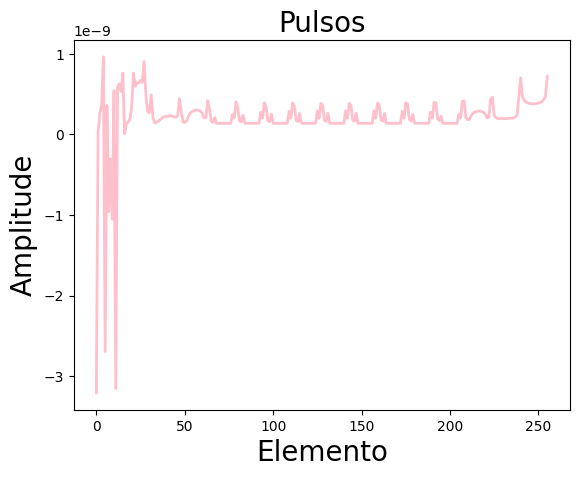

In [ ]:
def ampChart(pulsess):
    plt.title('Pulsos', fontsize=20)
    plt.xlabel('Elemento', fontsize=20) # Elemento = parte da placa dividida pelo segmento (N)
    plt.ylabel('Amplitude', fontsize=20) # Valor esperado
    plt.plot(pulse_values, color='pink', linewidth='2')
    plt.show()

# Gráfico plotado para o caso inicializado (N == 10)
ampChart(pulse_values)

Gráfico da distribuição de carga para N = 16:

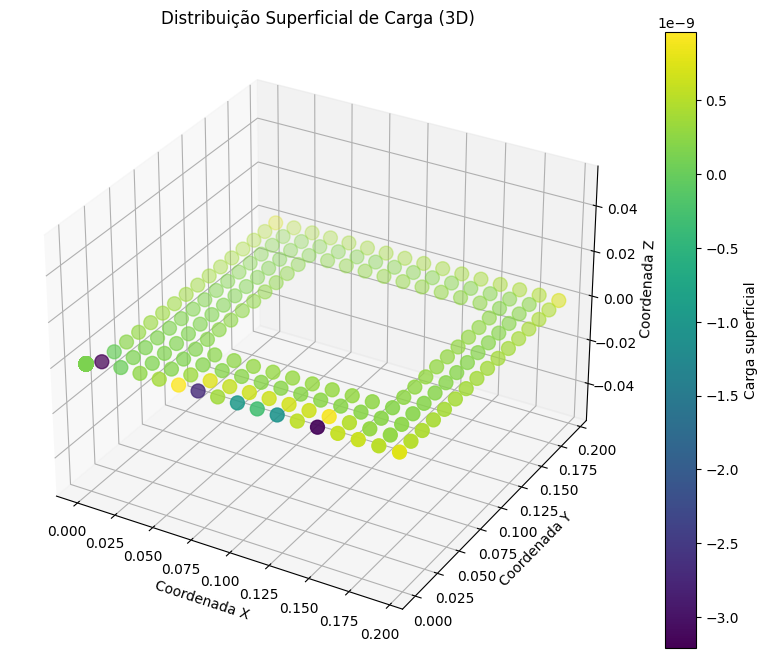

In [ ]:
# Gráfico 3D (distribuição de carga)

from mpl_toolkits.mplot3d import Axes3D

def plot_distribuicao_superficial_carga_3d(R, pulses):
    x = [coord[0] for coord in R]
    y = [coord[1] for coord in R]
    z = [coord[2] for coord in R]
    carga = pulses

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=carga, cmap='viridis', s=100)
    ax.set_xlabel('Coordenada X')
    ax.set_ylabel('Coordenada Y')
    ax.set_zlabel('Coordenada Z')
    ax.set_title('Distribuição Superficial de Carga (3D)')
    plt.colorbar(scatter, label='Carga superficial')
    plt.show()

# Usar a função para plotar a distribuição superficial de carga em 3D
plot_distribuicao_superficial_carga_3d(Rz, pulse_values)


#3. Resolva o problema e plote a distribuição superficial de carga para diferentes valores de N. Comente os resultados.

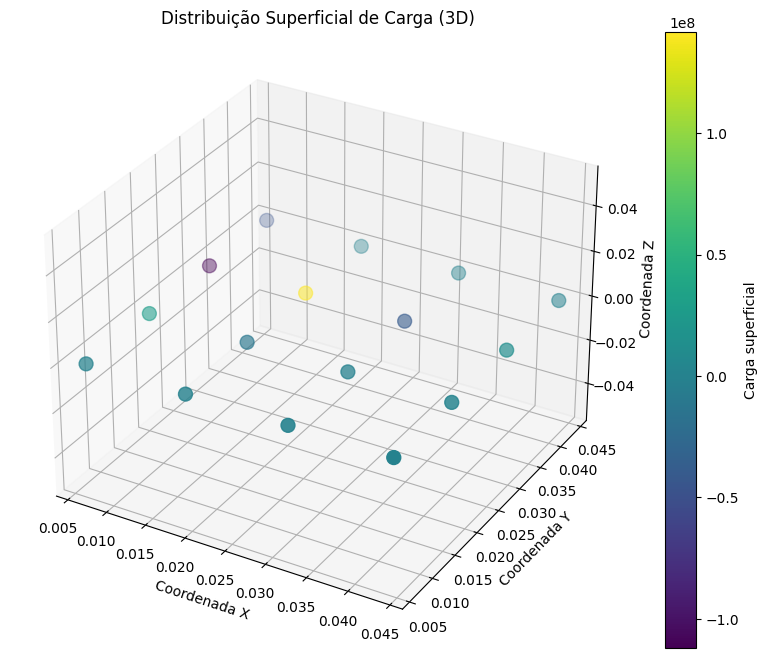

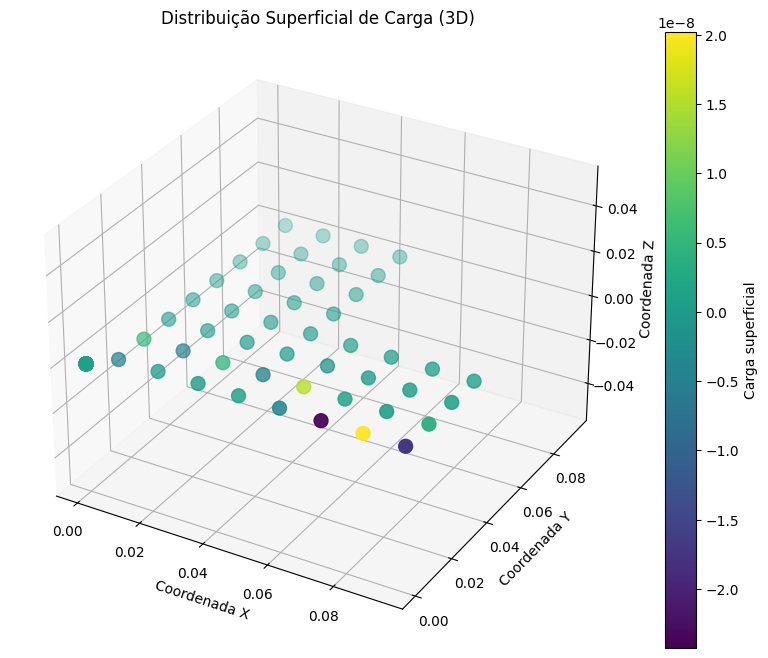

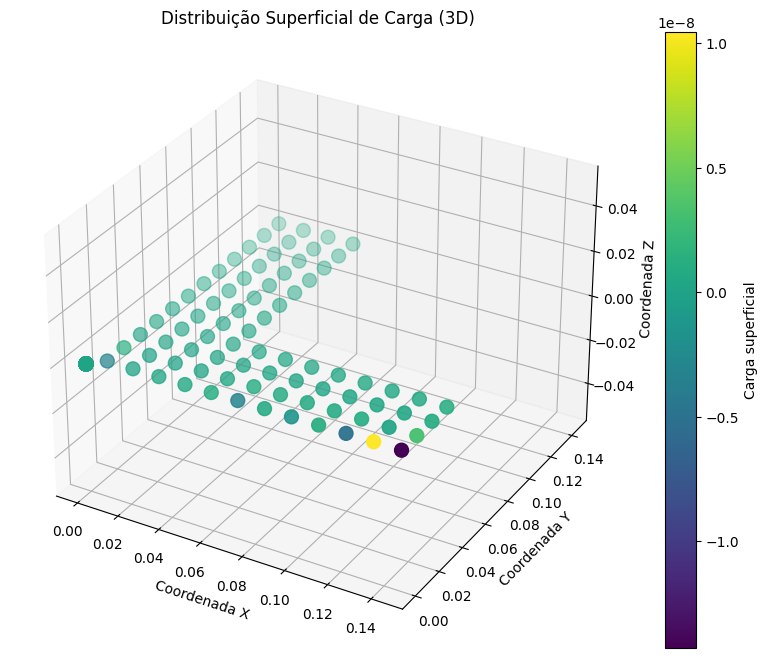

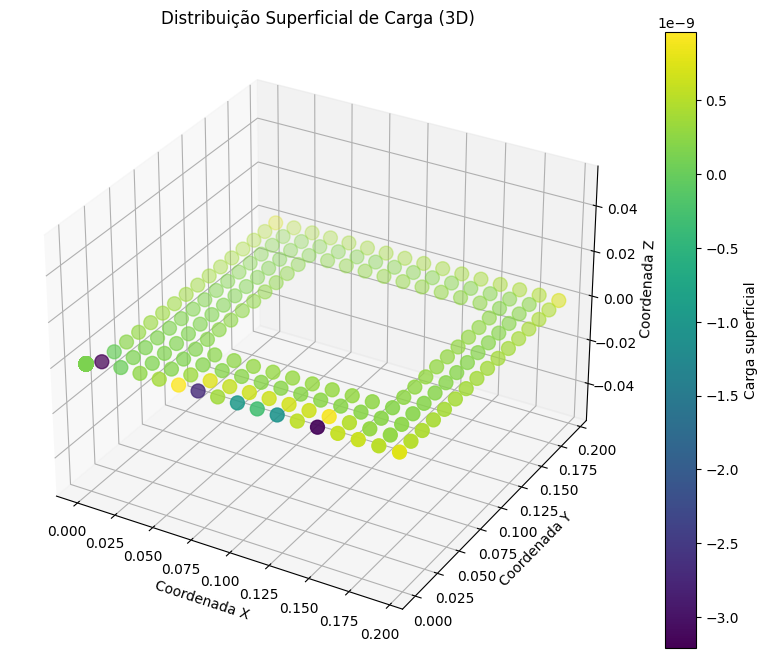

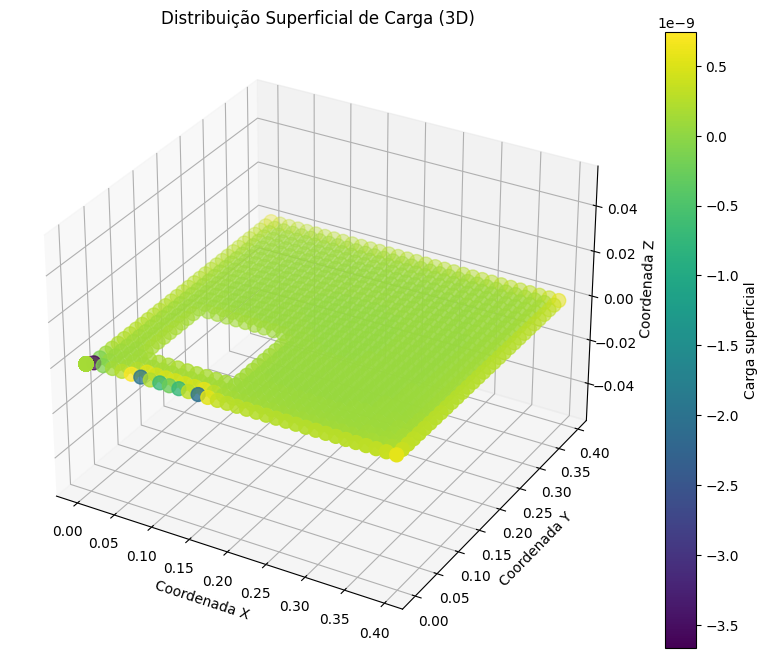

In [ ]:
Ns = [4, 8, 12, 16,32]  # Ou qualquer outro(s) múltiplo de 4 que se deseje testar

for N in Ns:
    Rz = coordenadasCentro(N)
    Zimp = matriz_Impedancia(N, Rz)
    matriz_tensao = tension_matrix(N)
    pulse_values = pulses(Zimp, matriz_tensao)
    plot_distribuicao_superficial_carga_3d(Rz, pulse_values) #A plotagem dos gráficos se refere a N = 4 á 32, respectivamente.



**Análise Gráfica:**

N = 4: Com um baixo número de elementos, a resolução da placa é relativamente baixa. Podemos observar que a distribuição superficial de carga é aproximadamente uniforme, com poucas variações perceptíveis.

N = 8: Com o aumento de N, a resolução da placa aumenta. Podemos começar a observar algumas variações na distribuição de carga, especialmente nas regiões próximas aos cantos da placa.

N = 12: Com N continuando a aumentar, as variações na distribuição superficial de carga se tornam mais evidentes. Observamos uma distribuição mais complexa, com padrões claros emergindo nas bordas da placa.

N = 16: Com um aumento adicional em N, a distribuição de carga torna-se mais refinada. Os padrões na distribuição de carga são mais nítidos e complexos, com variações significativas em toda a superfície da placa.

N = 32: Com o maior valor de N testado, a resolução da placa é muito alta. Isso resulta em uma distribuição de carga altamente detalhada, com padrões intricados e variações sutis em toda a placa.


Conclusão:

À medida que o número de elementos na placa aumenta (representado por N), a resolução da placa aumenta e a distribuição de carga se torna mais refinada.
Padrões complexos e variações significativas na distribuição de carga são observados com valores maiores de N, indicando uma representação mais precisa do comportamento eletromagnético da placa. No entanto, um maior número de elementos também implica em um aumento na complexidade computacional, o que deve ser considerado ao escolher o valor de N adequado para uma determinada aplicação.



#4.Determine a expressão da ”Capacitância” da placa (razão da carga total Q dividida pelo potencial V0) para a aproximação da carga. Varie N e observe a convergência da ”capacitância”.

Dado que a capacitância é expressa por C=$\frac{Q}{V}$, em que V=V0, já considerando a região vazada e não-vazada da placa no calculo da matriz de tensão, impedância e coordenadas do centro, a carga pode ser aproximada por:  **$Q \approx \triangle^2 \sum_{i}^N P_{i}$**. Então, **$C ≈\frac{\triangle^2 \sum_{i} P_{i}}{V0}$**.

Para N=8: 1.3107505667658198e-11

Para N=12: 8.248940926190577e-12

Para N=16: 7.980104651581547e-12

Para N=20: 6.506358299108512e-12

Para N=24: 5.45115588921477e-12

Para N=28: 4.6816313767482964e-12

Para N=32: 4.0994929348341496e-12

Para N=36: 3.64484307513648e-12

Para N=40: 3.2803513824001575e-12

Para N=44: 2.9818008786226526e-12

Para N=48: 2.7328701370572874e-12

Para N=52: 2.5221847721824407e-12



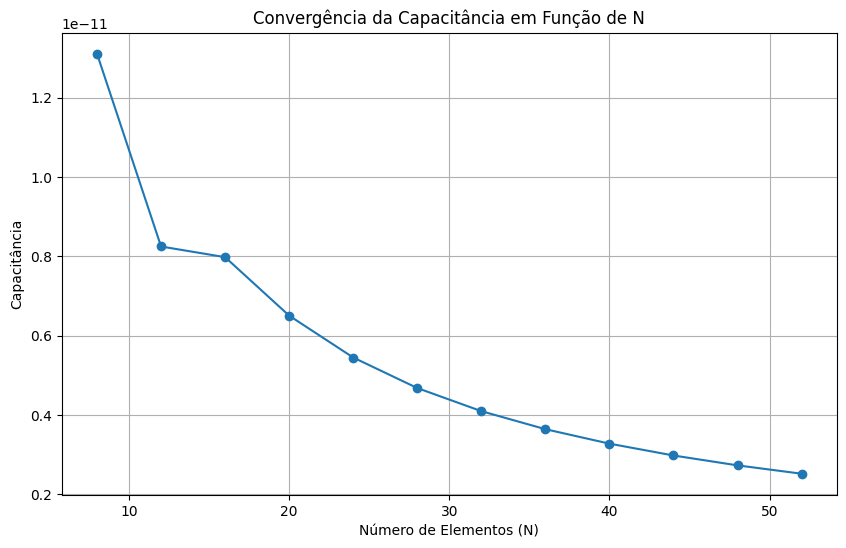

In [ ]:
capacitancia = []
Ns=[]

for i in range (8,53,4):
  cord_centro = coordenadasCentro(i)
  Zimp=matriz_Impedancia(i, cord_centro)
  Ttens=tension_matrix(i)
  cargaQ = sum(pulses(Zimp,Ttens))
  cap = cargaQ*((L/i)**2)/Vo
  capacitancia.append(cap)
  Ns.append(i)

  print(f'Para N={i}: {cap}')
  print()

plt.figure(figsize=(10, 6))
plt.plot(Ns, capacitancia, marker='o', linestyle='-')
plt.title('Convergência da Capacitância em Função de N')
plt.xlabel('Número de Elementos (N)')
plt.ylabel('Capacitância')
plt.grid(True)
plt.show()


Observações:

1) Convergência da Capacitância:

- À medida que o número de elementos  N aumenta, observamos uma melhoria na convergência da capacitância.

- Inicialmente, com poucos elementos, a precisão pode ser limitada. No entanto, à medida que  N aumenta, a discretização mais fina da placa leva a uma estimativa mais precisa da capacitância.

2) Estabilidade dos Resultados:

- Os resultados da capacitância devem estar se aproximando de um valor estável à medida que N aumenta.
- Após atingir um certo valor de N, os resultados da capacitância podem começar a se estabilizar, indicando que a precisão numérica é suficiente para os propósitos do problema.

3)Impacto da Discretização:

- A escolha adequada do número de elementos N é importante para equilibrar a precisão dos resultados com os recursos computacionais necessários.
- Uma discretização muito fina pode resultar em custos computacionais excessivos sem melhorar significativamente a precisão além de um certo ponto.